In [2]:
# sckit-learn
import sklearn

# Librosa
import librosa
import librosa.display
import torch
import IPython
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# using 'jazz.00024.wav' to explore audio data
sound, sample_rate = librosa.load('Data/genres_original/jazz/jazz.00015.wav')
IPython.display.Audio(sound, rate=sample_rate)

C:\Users\Jenai\AppData\Local\Temp/ipykernel_16392/2964945113.py:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sound, sample_rate)


Text(0.5, 1.0, "'jazz.00015.wav' sound waves")

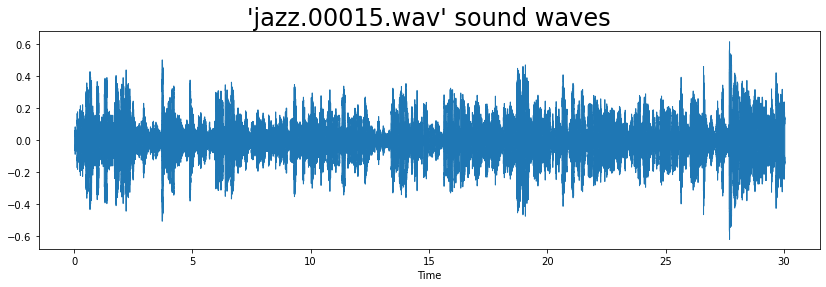

In [14]:
# a plot of 2D sound waves for 'jazz.00024.wav'
plt.figure(figsize = (14, 4))
librosa.display.waveshow(sound, sample_rate)
plt.title("'jazz.00015.wav' sound waves", fontsize=24)

 ...]

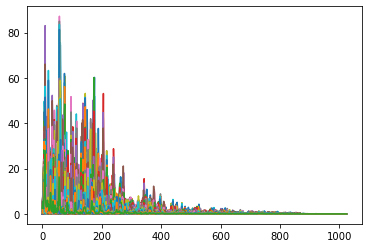

In [15]:
# short-time Fourier transform
transform = np.abs(librosa.stft(sound))
plt.figure()
plt.plot(transform)

C:\Users\Jenai\AppData\Local\Temp/ipykernel_16392/1886957362.py:8: FutureWarning: Pass y=[0.02145386 0.04266357 0.04168701 ... 0.00390625 0.0065918  0.01400757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  scale = librosa.feature.melspectrogram(sound)
C:\Users\Jenai\AppData\Local\Temp/ipykernel_16392/1886957362.py:14: FutureWarning: Pass y=[0.02145386 0.04266357 0.04168701 ... 0.00390625 0.0065918  0.01400757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(sound)
C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered wh

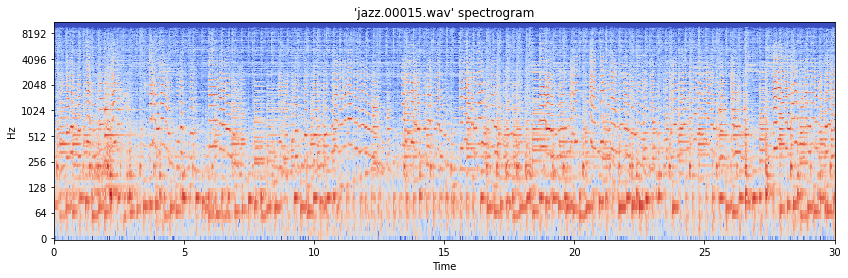

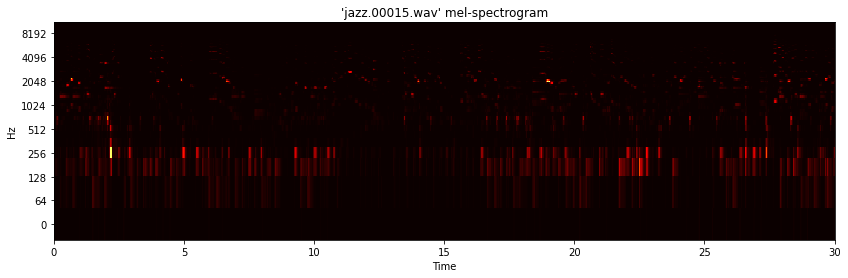

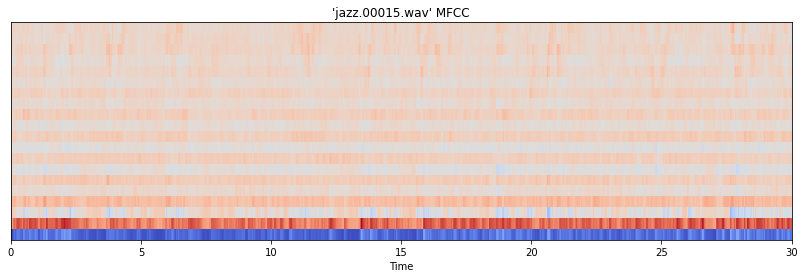

In [16]:
# spectrogram
decibels = librosa.amplitude_to_db(transform)
plt.figure(figsize = (14, 4))
plt.title("'jazz.00015.wav' spectrogram")
librosa.display.specshow(decibels, hop_length = 512, x_axis = 'time', y_axis = 'log')

# mel-spectrogram
scale = librosa.feature.melspectrogram(sound)
plt.figure(figsize = (14,4))
plt.title("'jazz.00015.wav' mel-spectrogram")
librosa.display.specshow(scale, hop_length = 512, x_axis = 'time', y_axis = 'log', cmap='hot')

# mel-frequncy cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(sound)
mfcc = sklearn.preprocessing.scale(mfcc)
plt.figure(figsize=(14, 4))
plt.title("'jazz.00015.wav' MFCC")
librosa.display.specshow(mfcc, x_axis='time')

C:\Users\Jenai\AppData\Local\Temp/ipykernel_10780/110313948.py:2: FutureWarning: Pass y=[0.02145386 0.04266357 0.04168701 ... 0.00390625 0.0065918  0.01400757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroid = librosa.feature.spectral_centroid(sound)[0]
C:\Users\Jenai\AppData\Local\Temp/ipykernel_10780/110313948.py:6: FutureWarning: Pass y=[0.02145386 0.04266357 0.04168701 ... 0.00390625 0.0065918  0.01400757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rolloff = librosa.feature.spectral_rolloff(sound)[0]


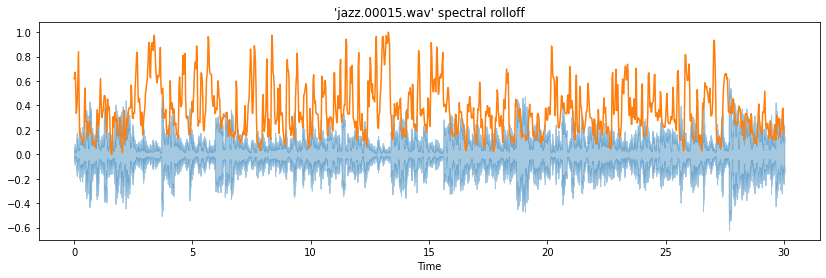

In [117]:
# spectral centroid
centroid = librosa.feature.spectral_centroid(sound)[0]
time = librosa.frames_to_time(range(len(centroid)))

# spectral rolloff
rolloff = librosa.feature.spectral_rolloff(sound)[0]
plt.figure(figsize = (14, 4))
plt.title("'jazz.00015.wav' spectral rolloff")
librosa.display.waveshow(sound, alpha=0.4)
plt.plot(time, sklearn.preprocessing.minmax_scale(rolloff, axis=0))



In [118]:
# music recommender using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# normalising features
audio_info = pd.read_csv('Data/features_30_sec.csv', index_col='filename')
features = audio_info[['label']]
features.head()
audio_info = audio_info.drop(columns = ['length', 'label'])
audio_info = preprocessing.scale(audio_info)

# cosine_similarity
s = cosine_similarity(audio_info)
sfeatures = pd.DataFrame(s)
snames = sfeatures.set_index(features.index)
snames.columns = features.index

# test example with 'jazz.00024.wav'
list_songs = snames['jazz.00015.wav'].sort_values(ascending = False)
print(list_songs.head(10))  # print the 10 most similar songs


filename
jazz.00015.wav    1.000000
jazz.00011.wav    0.895719
jazz.00095.wav    0.871857
jazz.00027.wav    0.857074
jazz.00012.wav    0.773841
jazz.00018.wav    0.760391
jazz.00029.wav    0.758945
jazz.00031.wav    0.744052
jazz.00098.wav    0.733944
jazz.00013.wav    0.726483
Name: jazz.00015.wav, dtype: float64
